## Segmentation Algorithm Demo for Desmosome (DSP)

Should we have a little description of DSP here?

Also, we may add a picture of the corresponding row in the lookup table for readers to correlate this notebook with a specifc row in the lookup table.

In [2]:
import os
import numpy as np

import matplotlib.pyplot as plt                          # package for image preview
from itkwidgets import view                              # package for 3d visualization
from aicsimageio import AICSImage                        # package for io 
from aicssegmentation.core.visual import img_seg_combine # function for segmentation result inspection
from aicssegmentation.core.seg_dot import dot_3d         # function for core algorithm
from aicssegmentation.pre_processing_utils import intensity_normalization, image_smoothing_gaussian_slice_by_slice
from skimage.morphology import remove_small_objects      # function for post-processing (size filter)

### Folder and file to be analyzed

In [3]:
#ROOT_FOLDER_NAME = '/allen/aics/assay-dev/Segmentation/documentation/toolkit_paper/structures/DSP'
FILE_NAME = '/allen/aics/assay-dev/Segmentation/documentation/toolkit_paper/structures/DSP/original/3500001080_100X_20170717_1-Scene-03-P3-E04.czi'

### Loading the data

In [4]:
reader = AICSImage(FILE_NAME) 
IMG = reader.data

print(IMG.shape)

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


(1, 7, 65, 624, 924)


### Preview of the image

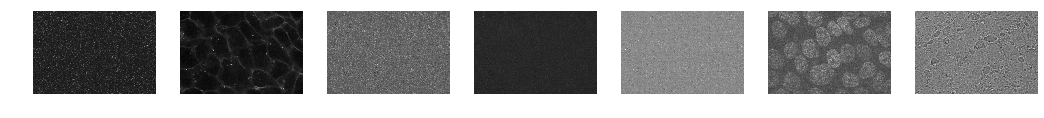

In [5]:
N_CHANNELS = IMG.shape[1]
MID_SLICE = np.int(0.5*IMG.shape[2])

fig, ax = plt.subplots(1, N_CHANNELS, figsize=(18,16), dpi=72, facecolor='w', edgecolor='k')
for channel in range(N_CHANNELS):
    ax[channel].axis('off')
    ax[channel].imshow(IMG[0,channel,MID_SLICE,:,:], cmap=plt.cm.gray)

### Image segmentation

#### Step 0: Define Parameters

In [6]:
structure_channel = 3
dynamic_range = -1
gaussian_smoothing_sigma = 1
dot_3d_sigma = 1
dot_3d_cutoff = 0.006
minArea = 20

#### Step 1: Pre-Processing

In [7]:
structure_img = IMG[0,structure_channel,:,:,:]

# intensity normalization
structure_img = intensity_normalization(structure_img, scaling_param=[0])

# smoothing with gaussian filter
structure_img_smooth = image_smoothing_gaussian_slice_by_slice(structure_img, sigma=gaussian_smoothing_sigma)

intensity normalization: using min-max normalization


#### Step 2: Core Algorithm

In [8]:
response = dot_3d(structure_img_smooth, log_sigma=dot_3d_sigma)
bw = response > dot_3d_cutoff

#### Step 3: Post-Processing 

In [9]:
# size filtering
SEG = remove_small_objects(bw>0, min_size=minArea, connectivity=1, in_place=False)

### Result inspection

In [10]:
view(img_seg_combine(structure_img,SEG))

Viewer(rendered_image=<itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkImageF3 *' at 0x7f5191fc8f…

In [11]:
view(structure_img)

Viewer(rendered_image=<itkImagePython.itkImageD3; proxy of <Swig Object of type 'itkImageD3 *' at 0x7f633282f6…

In [13]:
view(SEG.astype(np.uint8))

Viewer(rendered_image=<itkImagePython.itkImageUC3; proxy of <Swig Object of type 'itkImageUC3 *' at 0x7f633282…